In [4]:
import sys
import os

# Add the parent directory (my_project/) to Python path
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import torch 
from src.dataloaders import get_transforms, create_dataloaders
from src.model_builder import *
from src.model_builder_additional import *
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
from src.utils import get_device
# sort missing input scripts
from blitz.utils import variational_estimator
from blitz.modules import BayesianConv2d, BayesianLinear
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import matplotlib.image as mpimg
import random
from pathlib import Path



In [13]:
sample_1_pos = '/home/nlfrx7981/uncertainty/data_polar_lows/polar-lows/train/pos/1f0d88_20201002T062244_20201002T062359_mos_rgb.png'
sample_2_pos = '/home/nlfrx7981/uncertainty/data_polar_lows/polar-lows/train/pos/81cf14_20191031T062415_20191031T062542_mos_rgb.png'
sample_1_neg = '/home/nlfrx7981/uncertainty/data_polar_lows/polar-lows/train/neg/1cf757_20171023T071626_20171023T071823_mos_rgb.png'
sample_2_neg = '/home/nlfrx7981/uncertainty/data_polar_lows/polar-lows/train/neg/1ede49_20180720T121111_20180720T121311_mos_rgb.png'

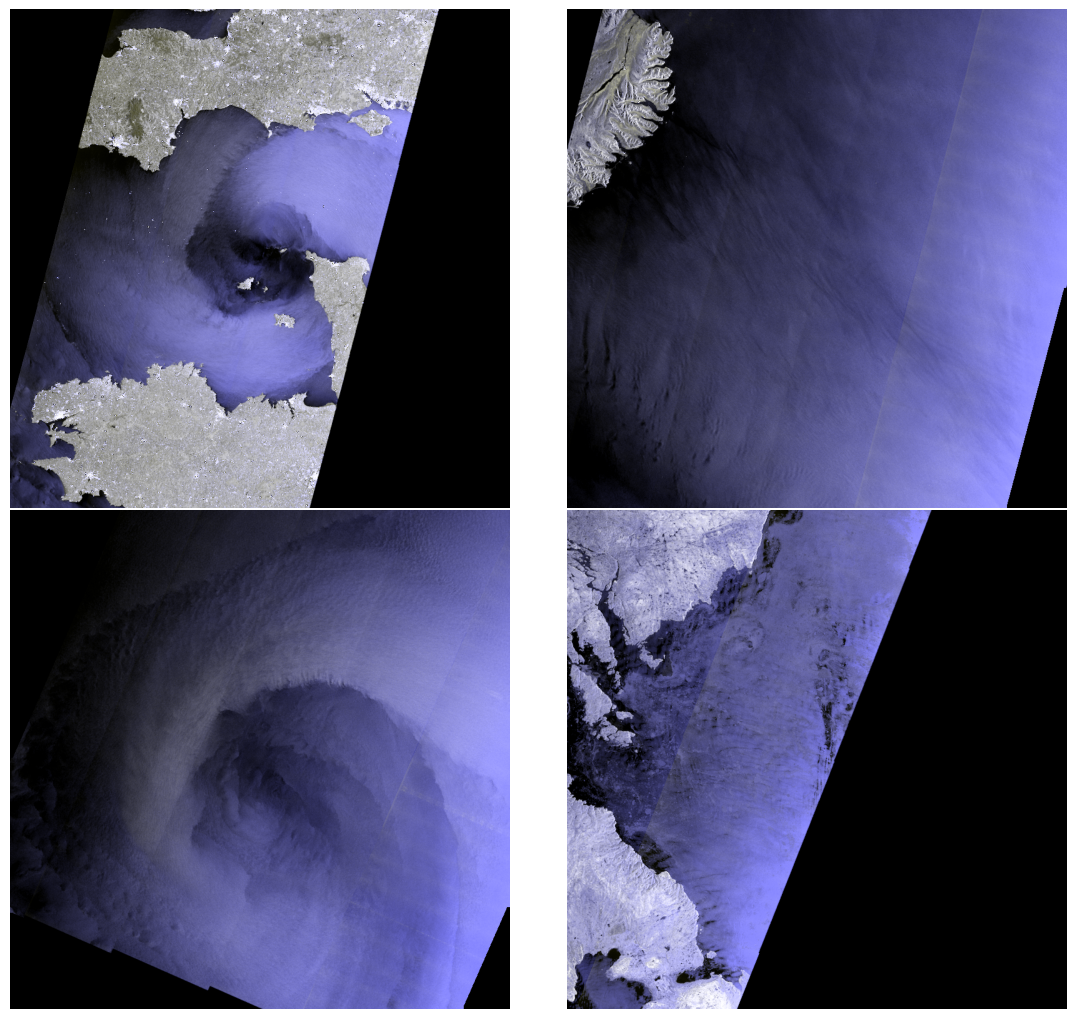

In [34]:
# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Load and plot images
img1 = mpimg.imread(sample_1_pos)
axes[0, 0].imshow(img1)
axes[0, 0].axis('off')

img2 = mpimg.imread(sample_1_neg)
axes[0, 1].imshow(img2)
axes[0, 1].axis('off')

img3 = mpimg.imread(sample_2_pos)
axes[1, 0].imshow(img3)
axes[1, 0].axis('off')

img4 = mpimg.imread(sample_2_neg)
axes[1, 1].imshow(img4)
axes[1, 1].axis('off')

# Adjust layout with specific parameters
plt.tight_layout(pad=0, h_pad=0.1, w_pad=-1)
plt.show()

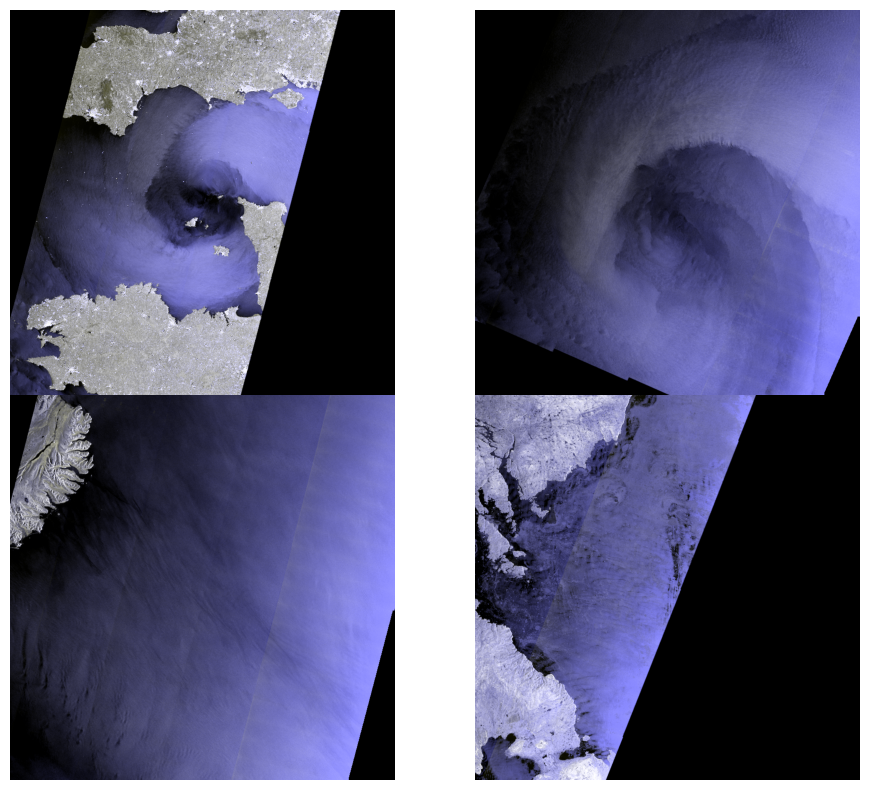

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Load and plot images
axes[0, 0].imshow(mpimg.imread(sample_1_pos)); axes[0, 0].axis("off")
axes[0, 1].imshow(mpimg.imread(sample_2_pos)); axes[0, 1].axis("off")
axes[1, 0].imshow(mpimg.imread(sample_1_neg)); axes[1, 0].axis("off")
axes[1, 1].imshow(mpimg.imread(sample_2_neg)); axes[1, 1].axis("off")

# Adjust spacing
plt.subplots_adjust(hspace=0, wspace=0)
plt.show()